# QPS parameters (query examples)

Please find below the way the QPS parameters can be queried and brief explanations meanings for some parameters.

In [120]:
import datetime
import lhcsmapi
from lhcsmapi.Time import Time
from lhcsmapi.metadata.thresholds import qps_thresholds

## 1.0 RB case

In [121]:
source = "A17R1"  # MB location
timestamp = Time.to_unix_timestamp(datetime.datetime.now())

### 1.1 Magnet, iQPS: DQQDL or U_QS0 (used in RB_FPA notebook)

Exeptionally, can be varied from magnet to magnet

In [122]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDS', comment='symmetric', upper_threshold=500.0, lower_threshold=500.0, evaluation_time=10.0),
 QpsThreshold(board='DQQDS', comment='sunglasses activation', upper_threshold=0.0, lower_threshold=1560.0, evaluation_time=1300.0),
 QpsThreshold(board='DQQDL', comment='differential', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=10.0)]

<div class="alert alert-block alert-danger">
<b>qps_thresholds.csv: Unfortunately, one line per MB is missing. It is 'Sunglasses Threshold' from 01/04/2022 till 2050 ;(</b>
</div>

In [123]:
for i in range(len(threshold_list)):
    if threshold_list[i].board == "DQQDL":
        threshold_uqs0 = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time

In [124]:
print(source)
print("Threshold for U_QS0 =", threshold_uqs0, "V")
print("Evaluation time for U_QS0 =", evaluation_time, "ms")

A17R1
Threshold for U_QS0 = 0.1 V
Evaluation time for U_QS0 = 10.0 ms


### 1.2 Current Leads: DQQDC or U_RES & U_HTS (used in RB_FPA and in some other RB HWC notebooks)

Unique per circuit, so doesn't depend on magnet

U_HTS - High Temperature Superconductor part, U_RES - resistive copper part

In [125]:
threshold_list = qps_thresholds.get_thresholds_for_lead(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDC', comment='resistive part (U_RES)', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=100.0),
 QpsThreshold(board='DQQDC', comment='HTS part (U_HTS)', upper_threshold=1.0, lower_threshold=1.0, evaluation_time=100.0)]

In [126]:
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "resistive part (U_RES)":
        threshold_ures = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if threshold_list[i].comment == "HTS part (U_HTS)":
        threshold_uhts = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time

In [127]:
print(source)
print("Threshold for U_RES =", threshold_ures, "V")
print("Threshold for U_HTS =", threshold_uhts, "V")
print("Evaluation Time =", evaluation_time, "ms")

A17R1
Threshold for U_RES = 0.1 V
Threshold for U_HTS = 0.001 V
Evaluation Time = 100.0 ms


### 1.3 Magnet, nQPS: DQQDS or symmetric quench detection

Exeptionally, can be varied from magnet to magnet

https://wikis.cern.ch/display/MPEEP/QPS+Sunglasses+-+filter

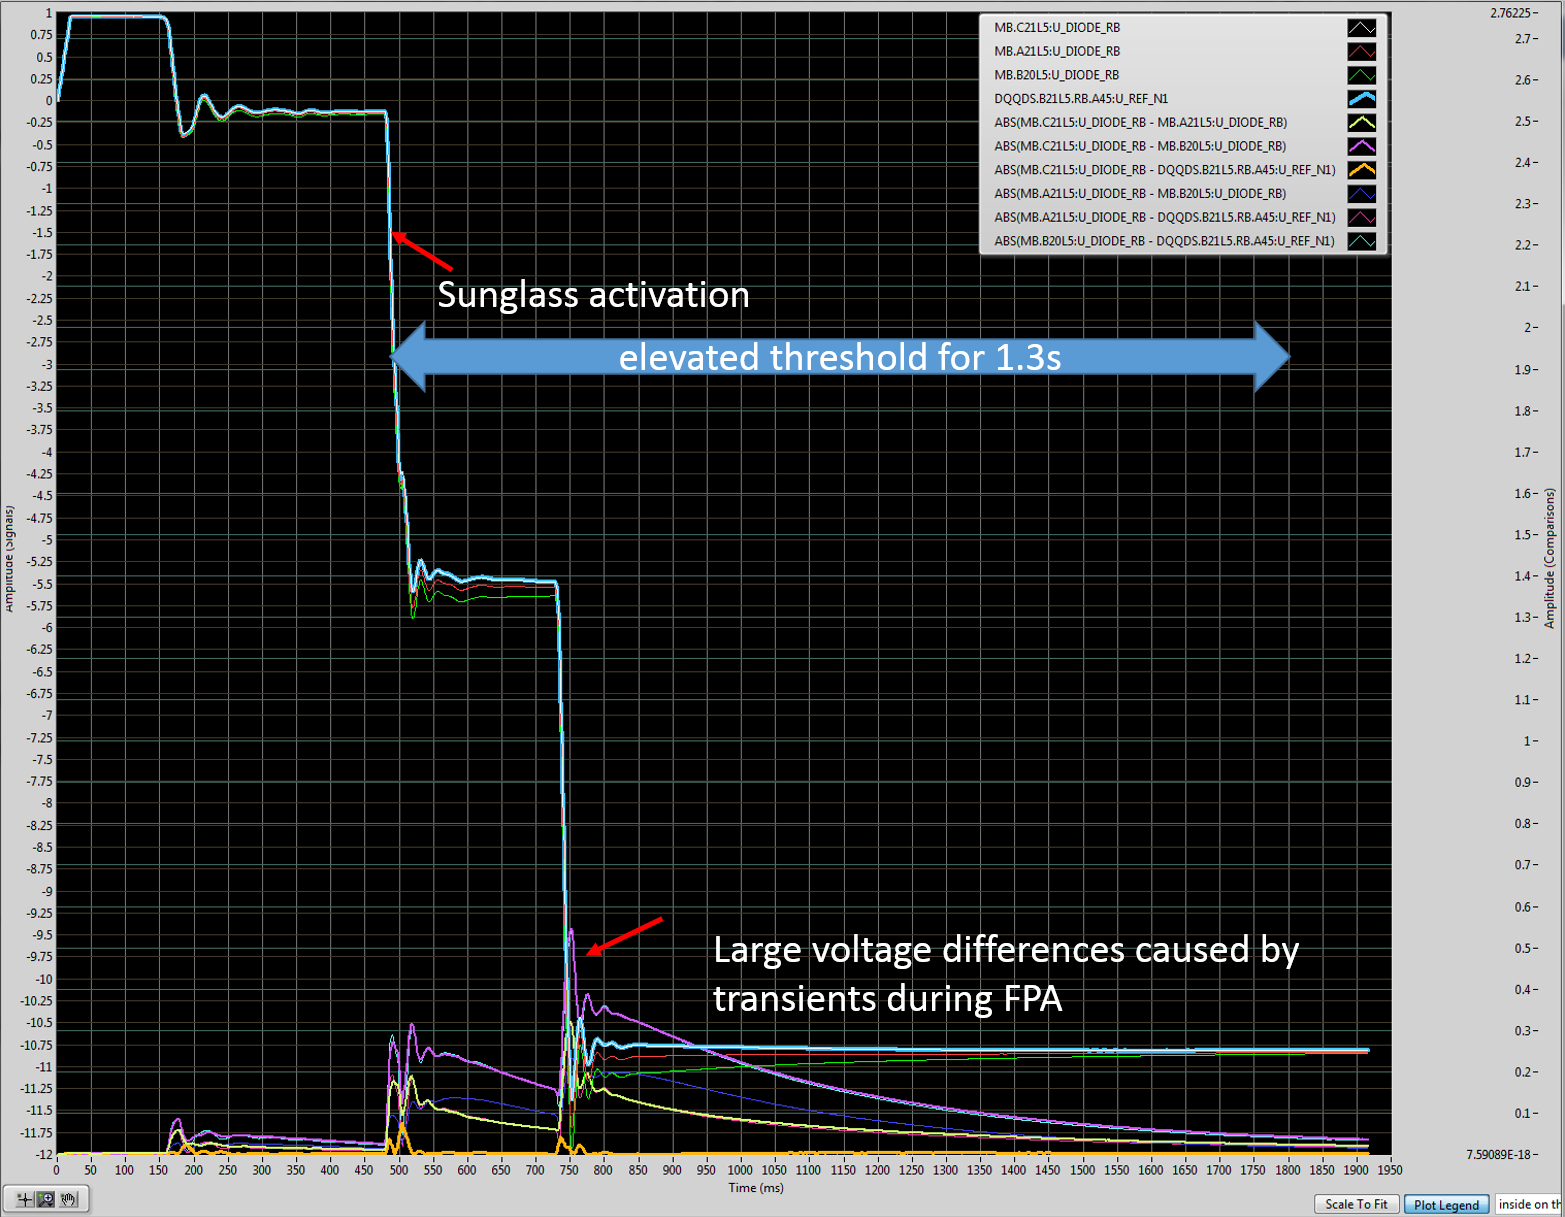


In [128]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)

In [129]:
for i in range(len(threshold_list)):
    if (threshold_list[i].board == "DQQDS") and (threshold_list[i].comment == "symmetric"):
        threshold_sym = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if (threshold_list[i].board == "DQQDS") and (threshold_list[i].comment == "sunglasses activation"):
        threshold_sun_act = -abs(threshold_list[i].lower_threshold) / 1000
    if (threshold_list[i].board == "DQQDS") and (threshold_list[i].comment == "sunglasses activation"):
        sunglasses_duration = threshold_list[i].evaluation_time

In [95]:
print(source)
print("Threshold for sysmmetric quench =", threshold_sym, "V")
print("Threshold for sunglasses activation =", threshold_sun_act, "V")
print("Sunglasses duration =", sunglasses_duration, "ms")
print("Threshold for symmetric quench at sunglasse activated state = ???")

A17R1
Threshold for sysmmetric quench = 0.5 V
Threshold for sunglasses activation = -1.56 V
Sunglasses duration = 1300.0 ms
Threshold for symmetric quench at sunglasse activated state = ???


## 2.0 RQ case

In [96]:
source = "RQD.A12"  # circuit name
timestamp = Time.to_unix_timestamp(datetime.datetime.now())

### 2.1 Magnet, iQPS: DQQDL or U_QS0 (used in RQ_FPA notebook)

In [97]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)

In [98]:
for i in range(len(threshold_list)):
    if threshold_list[i].board == "DQQDL":
        threshold_uqs0 = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time

In [99]:
print(source)
print("Threshold for U_QS0 =", threshold_uqs0, "V")
print("Evaluation Time =", evaluation_time, "ms")

RQD.A12
Threshold for U_QS0 = 0.1 V
Evaluation Time = 10.0 ms


### 2.2 Current Leads: DQQDC or U_RES & U_HTS (used in RQ_FPA and in some other RQ HWC notebooks)

In [100]:
threshold_list = qps_thresholds.get_thresholds_for_lead(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDC', comment='resistive part (U_RES)', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=100.0),
 QpsThreshold(board='DQQDC', comment='HTS part (U_HTS)', upper_threshold=1.0, lower_threshold=1.0, evaluation_time=100.0)]

In [101]:
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "resistive part (U_RES)":
        threshold_ures = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if threshold_list[i].comment == "HTS part (U_HTS)":
        threshold_uhts = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time

In [102]:
print(source)
print("Threshold for U_RES =", threshold_ures, "V")
print("Threshold for U_HTS =", threshold_uhts, "V")
print("Evaluation Time =", evaluation_time, "ms")

RQD.A12
Threshold for U_RES = 0.1 V
Threshold for U_HTS = 0.001 V
Evaluation Time = 100.0 ms


### 2.3 Magnet, nQPS: DQQDS or symmetric quench detection

In [103]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)

In [104]:
threshold_list

[QpsThreshold(board='DQQDL', comment='differential', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=10.0),
 QpsThreshold(board='DQQDS', comment='symmetric', upper_threshold=200.0, lower_threshold=200.0, evaluation_time=10.0),
 QpsThreshold(board='DQQDS', comment='symmetric sunglasses', upper_threshold=900.0, lower_threshold=900.0, evaluation_time=10.0),
 QpsThreshold(board='DQQDS', comment='sunglasses activation', upper_threshold=0.0, lower_threshold=360.0, evaluation_time=500.0)]

In [105]:
for i in range(len(threshold_list)):
    if (threshold_list[i].board == "DQQDS") and (threshold_list[i].comment == "symmetric"):
        threshold_sym = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time
    if (threshold_list[i].board == "DQQDS") and (threshold_list[i].comment == "sunglasses activation"):
        threshold_sun_act = -abs(threshold_list[i].lower_threshold) / 1000
        sunglasses_duration = threshold_list[i].evaluation_time
    if (threshold_list[i].board == "DQQDS") and (threshold_list[i].comment == "symmetric sunglasses"):
        sunglasses_threshold = threshold_list[i].upper_threshold / 1000

In [106]:
print(source)
print("Threshold for sysmmetric quench =", threshold_sym, "V")
print("Evaluation Time =", evaluation_time, "ms")
print("Threshold for sunglasses activation =", threshold_sun_act, "V")
print("Sunglasses duration =", sunglasses_duration, "ms")
print("Sunglasses threshold =", sunglasses_threshold, "V")

RQD.A12
Threshold for sysmmetric quench = 0.2 V
Evaluation Time = 10.0 ms
Threshold for sunglasses activation = -0.36 V
Sunglasses duration = 500.0 ms
Sunglasses threshold = 0.9 V


## 3.0 IT case

In [107]:
source = "RQX.R1"  # circuit name
timestamp = Time.to_unix_timestamp(datetime.datetime.now())

### 3.1 Magnet: DQQDT or U_RES (used in IT_FPA notebook)

In [108]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDT', comment='differential', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=10.0),
 QpsThreshold(board='DQQDT', comment='absolute', upper_threshold=8500.0, lower_threshold=8500.0, evaluation_time=10.0)]

In [109]:
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "differential":
        threshold_dif = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time
    if threshold_list[i].comment == "absolute":
        threshold_abs = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000

In [110]:
print(source)
print("Differential Threshold =", threshold_dif, "V")
print("Absolute Threshold =", threshold_abs, "V")
print("Evaluation Time =", evaluation_time, "ms")

RQX.R1
Differential Threshold = 0.1 V
Absolute Threshold = 8.5 V
Evaluation Time = 10.0 ms


### 3.2 Current Leads: DQQDC or U_RES & U_HTS (used in IT_FPA and in some other IT HWC notebooks)

In [111]:
threshold_list = qps_thresholds.get_thresholds_for_lead(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDC', comment='resistive part (U_RES)', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=100.0),
 QpsThreshold(board='DQQDC', comment='HTS part (U_HTS)', upper_threshold=3.0, lower_threshold=3.0, evaluation_time=100.0)]

In [113]:
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "resistive part (U_RES)":
        threshold_ures = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if threshold_list[i].comment == "HTS part (U_HTS)":
        threshold_uhts = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time

In [114]:
print("Threshold for U_RES =", threshold_ures, "V")
print("Threshold for U_HTS =", threshold_uhts, "V")
print("Evaluation Time =", evaluation_time, "ms")

Threshold for U_RES = 0.1 V
Threshold for U_HTS = 0.003 V
Evaluation Time = 100.0 ms


## 4.0 IPQ&IPD case

In [115]:
source = "RQ4.R6"  # circuit name
timestamp = Time.to_unix_timestamp(datetime.datetime.now())

### 4.1 Magnet: nDQQDI or U_RES (used in IPQ_FPA notebook)

Differential threshlod is for U_RES = U_1 - U_2

Absolute threshold for U_1 + U_2

In [116]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)
threshold_list

[QpsThreshold(board='nDQQDI', comment='differential', upper_threshold=40.0, lower_threshold=40.0, evaluation_time=10.0),
 QpsThreshold(board='nDQQDI', comment='absolute', upper_threshold=5000.0, lower_threshold=5000.0, evaluation_time=10.0)]

In [117]:
#
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "differential":
        threshold_dif = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time
    if threshold_list[i].comment == "absolute":
        threshold_abs = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
#
print("Differential Threshold =", threshold_dif, "V")
print("Absolute Threshold =", threshold_abs, "V")
print("Evaluation Time =", evaluation_time, "ms")

Differential Threshold = 0.04 V
Absolute Threshold = 5.0 V
Evaluation Time = 10.0 ms


### 4.2 DQQDC or U_RES & U_HTS (used in IPQ_FPA and in some other IT HWC notebooks)

In [37]:
threshold_list = qps_thresholds.get_thresholds_for_lead(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDC', comment='resistive part (U_RES)', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=100.0),
 QpsThreshold(board='DQQDC', comment='HTS part (U_HTS)', upper_threshold=3.0, lower_threshold=3.0, evaluation_time=100.0)]

In [38]:
#
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "resistive part (U_RES)":
        threshold_ures = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if threshold_list[i].comment == "HTS part (U_HTS)":
        threshold_uhts = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time
#
print("Threshold for U_RES =", threshold_ures, "V")
print("Threshold for U_HTS =", threshold_uhts, "V")
print("Evaluation Time =", evaluation_time, "ms")

Threshold for U_RES = 0.1 V
Threshold for U_HTS = 0.003 V
Evaluation Time = 100.0 ms


## 5.0 600A case

In [48]:
source = "RQS.L2B1"
# source = 'RCS.A34B2' # circuit name
timestamp = Time.to_unix_timestamp(datetime.datetime.now())

### 5.1 nDQQDI or U_RES (used in 600A_FPA notebook)

In [49]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)
threshold_list

[QpsThreshold(board='DQQDG', comment='|I|<50 A', upper_threshold=2000.0, lower_threshold=2000.0, evaluation_time=190.0),
 QpsThreshold(board='DQQDG', comment='|I|>=50 A', upper_threshold=100.0, lower_threshold=100.0, evaluation_time=190.0)]

In [50]:
threshold_list = qps_thresholds.get_thresholds_for_magnet(source, timestamp)
#
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "|I|<50 A":
        threshold_50A = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if threshold_list[i].comment == "|I|>=50 A":
        threshold = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time
#
print("Threshold (|I|<50 A) =", threshold_50A, "V")
print("Threshold (|I|>=50 A) =", threshold, "V")
print("Evaluation Time =", evaluation_time, "ms")

Threshold (|I|<50 A) = 2.0 V
Threshold (|I|>=50 A) = 0.1 V
Evaluation Time = 190.0 ms


### 5.2 DQQDC or U_RES & U_HTS (used in 600A_FPA and in some other 600A HWC notebooks)

In [51]:
threshold_list = qps_thresholds.get_thresholds_for_lead(source, timestamp)
#
for i in range(len(threshold_list)):
    if threshold_list[i].comment == "resistive part (U_RES)":
        threshold_ures = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
    if threshold_list[i].comment == "HTS part (U_HTS)":
        threshold_uhts = min(threshold_list[i].upper_threshold, threshold_list[i].lower_threshold) / 1000
        evaluation_time = threshold_list[i].evaluation_time
#
print("Threshold for U_RES =", threshold_ures, "V")
print("Threshold for U_HTS =", threshold_uhts, "V")
print("Evaluation Time =", evaluation_time, "ms")

Threshold for U_RES = 0.1 V
Threshold for U_HTS = 0.003 V
Evaluation Time = 100.0 ms
